In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('WaterQualityPrediction-Dataset.csv', sep=';')
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df = df.sort_values(by='date')
df_clean = df.dropna().reset_index(drop=True)

In [ ]:
def check_limits(row):
    return {
        'NH4_Status': 'Acceptable' if row['NH4'] < 0.5 else 'High',
        'BSK5_Status': 'Acceptable' if row['BSK5'] < 3 else 'High',
        'Suspended_Status': 'Acceptable' if row['Suspended'] < 25 else 'High',
        'O2_Status': 'Acceptable' if row['O2'] > 5 else 'Low',
        'NO3_Status': 'Acceptable' if row['NO3'] < 10 else 'High',
        'NO2_Status': 'Acceptable' if row['NO2'] < 0.1 else 'High',
        'SO4_Status': 'Acceptable' if row['SO4'] < 250 else 'High',
        'PO4_Status': 'Acceptable' if row['PO4'] < 0.1 else 'High',
        'CL_Status': 'Acceptable' if row['CL'] < 250 else 'High'
    }

In [23]:
limits_df = df_clean.apply(lambda row: pd.Series(check_limits(row)), axis=1)
df_combined = pd.concat([df_clean, limits_df], axis=1)

NH4_Status           685
BSK5_Status         1711
Suspended_Status     281
O2_Status            190
NO3_Status           165
NO2_Status           863
SO4_Status            69
PO4_Status          2243
CL_Status             76
dtype: int64


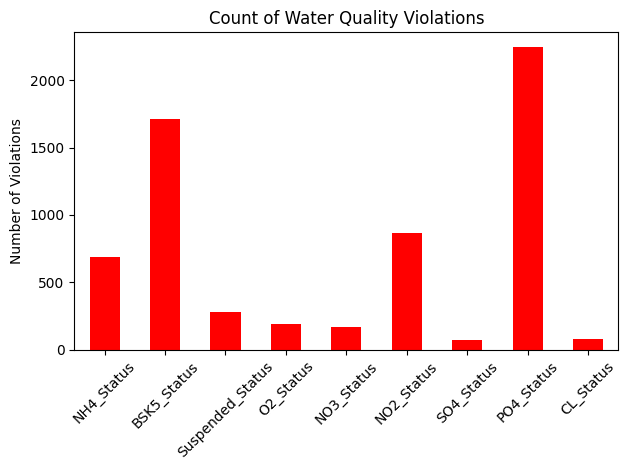

In [24]:
violation_counts = df_combined.filter(like='_Status').apply(lambda col: (col != 'Acceptable').sum())
print(violation_counts)
violation_counts.plot(kind='bar', color='red')
plt.title('Count of Water Quality Violations')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

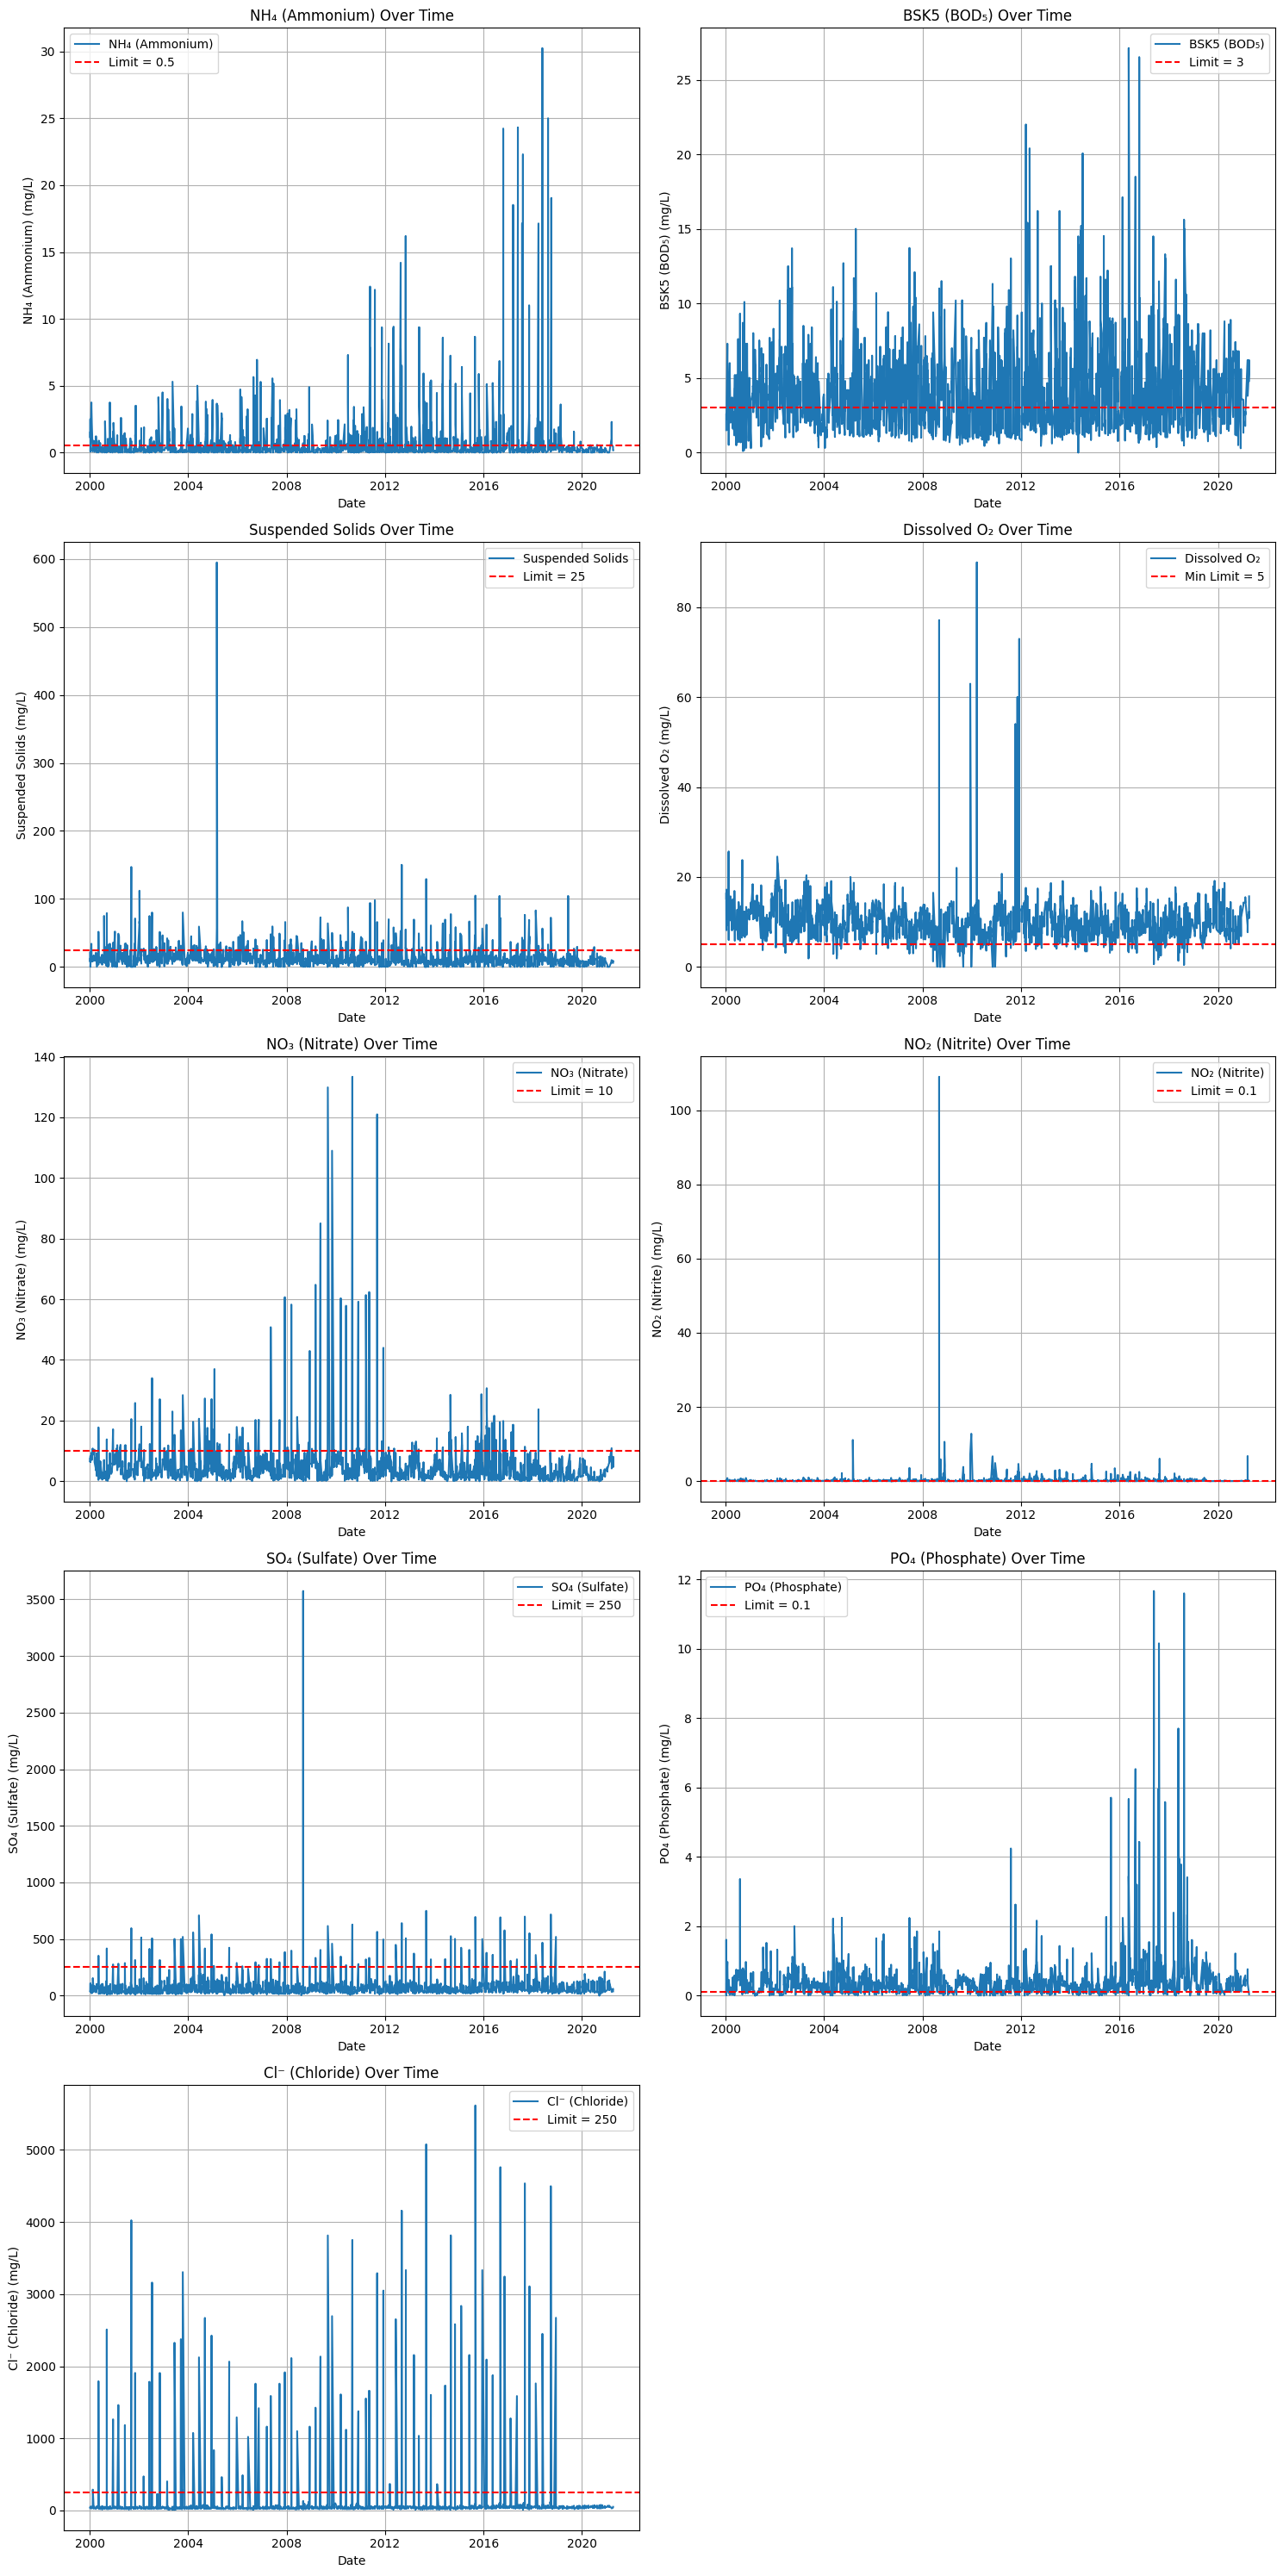

In [25]:
params_info = [
    ('NH4', 0.5, 'upper', 'NH₄ (Ammonium)'),
    ('BSK5', 3, 'upper', 'BSK5 (BOD₅)'),
    ('Suspended', 25, 'upper', 'Suspended Solids'),
    ('O2', 5, 'lower', 'Dissolved O₂'),
    ('NO3', 10, 'upper', 'NO₃ (Nitrate)'),
    ('NO2', 0.1, 'upper', 'NO₂ (Nitrite)'),
    ('SO4', 250, 'upper', 'SO₄ (Sulfate)'),
    ('PO4', 0.1, 'upper', 'PO₄ (Phosphate)'),
    ('CL', 250, 'upper', 'Cl⁻ (Chloride)')
]

plt.figure(figsize=(15, 30))
for idx, (col, limit, direction, label) in enumerate(params_info, 1):
    plt.subplot(5, 2, idx)
    plt.plot(df_combined['date'], df_combined[col], label=label)
    if direction == 'upper':
        plt.axhline(limit, color='red', linestyle='--', label=f'Limit = {limit}')
    else:
        plt.axhline(limit, color='red', linestyle='--', label=f'Min Limit = {limit}')
    plt.title(f'{label} Over Time')
    plt.xlabel('Date')
    plt.ylabel(f'{label} (mg/L)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

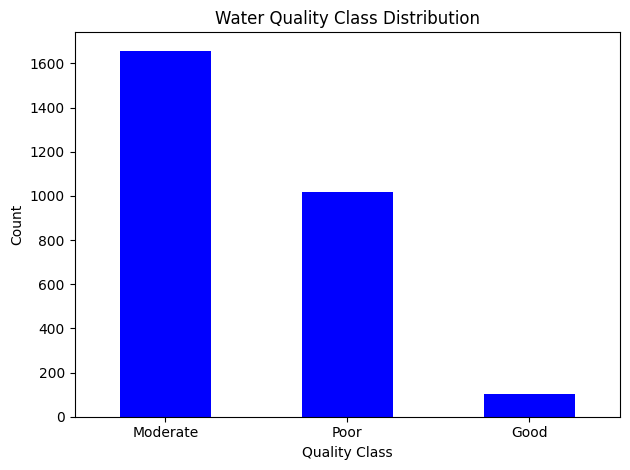

In [26]:
df_combined['Violations'] = df_combined.filter(like='_Status').apply(lambda row: sum(row != 'Acceptable'), axis=1)
def quality_class(v):
    if v == 0:
        return 'Good'
    elif v <= 2:
        return 'Moderate'
    else:
        return 'Poor'
df_combined['Quality_Class'] = df_combined['Violations'].apply(quality_class)
df_combined['Quality_Class'].value_counts().plot(kind='bar', color='blue')
plt.title('Water Quality Class Distribution')
plt.xlabel('Quality Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

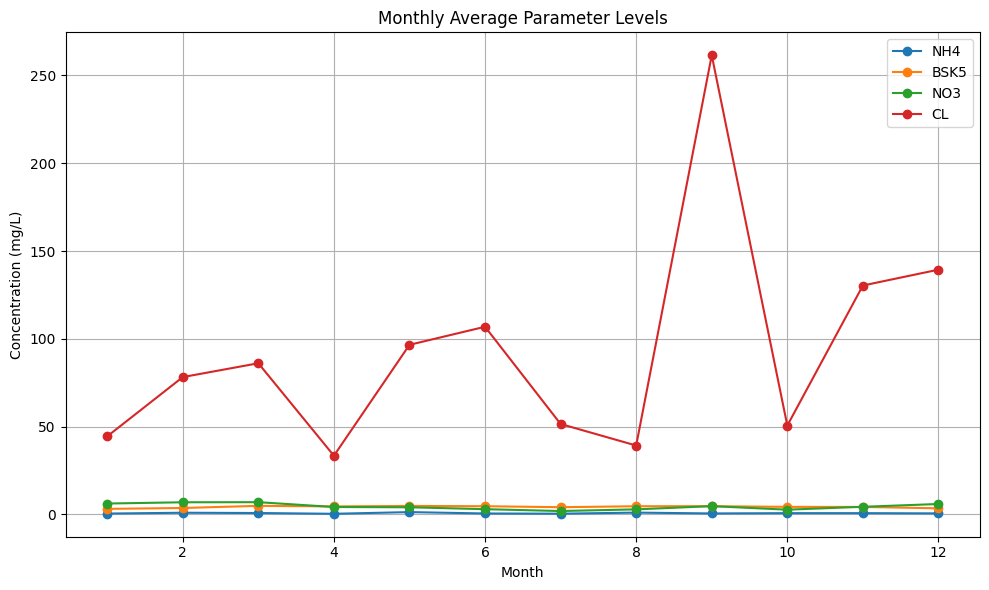

In [27]:
df_combined.to_csv('WaterQualityPrediction-Processed.csv', index=False)
df_combined['Month'] = df_combined['date'].dt.month
monthly_avg = df_combined.groupby('Month')[['NH4', 'BSK5', 'NO3', 'CL']].mean()

monthly_avg.plot(kind='line', figsize=(10, 6), marker='o')
plt.title("Monthly Average Parameter Levels")
plt.ylabel("Concentration (mg/L)")
plt.grid(True)
plt.tight_layout()
plt.show()